In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import random


#### Поиск остовного дерева минимального веса на динамических графах

Входные данные: 
1.	Связный граф не менее 50 вершин.
2.	Веса ребер в диапазоне от 1 до 10 случайным образом.


Задача 1.
1.	Построить остовное дерево минимального веса на графе, используя алгоритм Краскала.
2.	Визуализировать решение.


In [2]:
H = nx.path_graph(10)

50


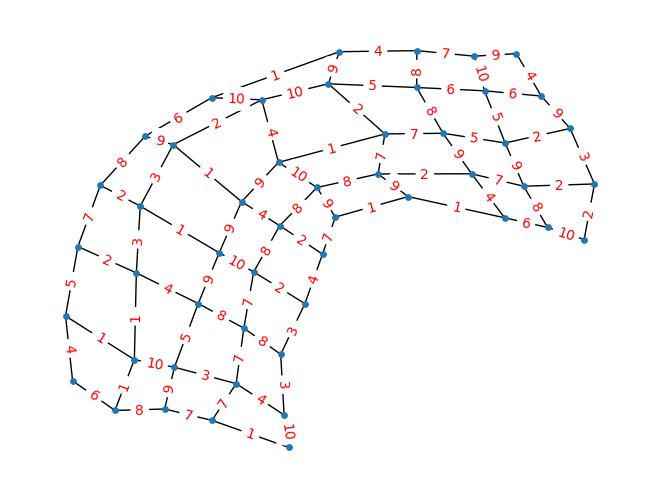

In [37]:
G = nx.grid_2d_graph(10, 5)
print(G.number_of_nodes())

# random_peaks = [i+1 for i in range(50)]


# G.add_nodes_from(random_peaks)
for u, v in G.edges():
    G[u][v]['weight'] = random.randint(1,10)

# random_edges = [(x, y, random.randint(1, 10)) for x, y in enumerate(random_peaks)]
# G.add_weighted_edges_from(random_edges)


g_layout = nx.spring_layout(G)

nx.draw(G, pos=g_layout, font_weight="medium", node_size=15, font_color="blue")
edge_labels = nx.get_edge_attributes(G, "weight")

nx.draw_networkx_edge_labels(G, pos=g_layout, edge_labels=edge_labels, font_color="red")
plt.show()



Вес остовного дерева минимального веса: 174


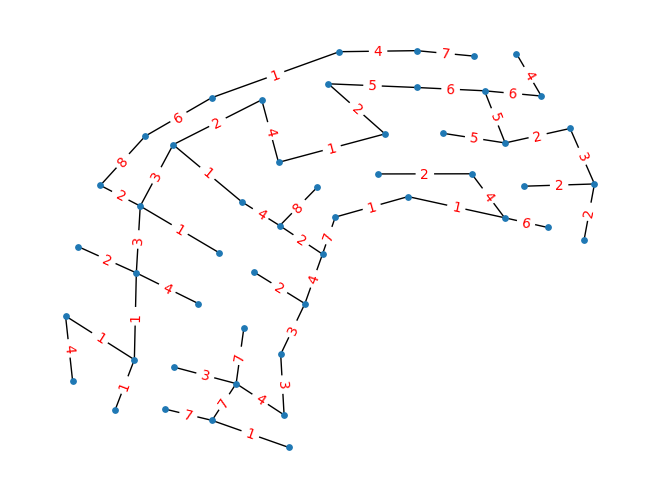

In [38]:
T = nx.minimum_spanning_tree(G)
nx.draw(T, pos=g_layout, font_weight="medium", node_size=15, font_color="blue")
edge_labels = nx.get_edge_attributes(T, "weight")

nx.draw_networkx_edge_labels(T, pos=g_layout, edge_labels=edge_labels, font_color="red")
print("Вес остовного дерева минимального веса:", sum(data['weight'] for _, _, data in T.edges(data=True)))
plt.show()

Задача 2.
1.	Выбрать случайным образом 5 ребер графа и поменять их веса в диапазоне от 1 до 3. Построить остовное дерево минимального веса. Проверить как количественно и структурно изменилось решение.
2.	Визуализировать изменение решения.


In [85]:
G_copy = G.copy()

Ребра остовного дерева минимального веса:
[((0, 0), (1, 0), {'weight': 4}), ((0, 1), (1, 1), {'weight': 1}), ((0, 2), (0, 3), {'weight': 7}), ((0, 3), (0, 4), {'weight': 1}), ((0, 3), (1, 3), {'weight': 7}), ((1, 0), (1, 1), {'weight': 1}), ((1, 1), (2, 1), {'weight': 1}), ((1, 2), (1, 3), {'weight': 3}), ((1, 3), (2, 3), {'weight': 2}), ((1, 3), (1, 4), {'weight': 4}), ((1, 4), (2, 4), {'weight': 3}), ((2, 0), (2, 1), {'weight': 2}), ((2, 1), (3, 1), {'weight': 3}), ((2, 1), (2, 2), {'weight': 4}), ((2, 4), (3, 4), {'weight': 3}), ((3, 0), (3, 1), {'weight': 2}), ((3, 0), (4, 0), {'weight': 8}), ((3, 1), (3, 2), {'weight': 1}), ((3, 1), (4, 1), {'weight': 3}), ((3, 3), (3, 4), {'weight': 2}), ((3, 4), (4, 4), {'weight': 1}), ((4, 0), (5, 0), {'weight': 6}), ((4, 1), (4, 2), {'weight': 1}), ((4, 1), (5, 1), {'weight': 2}), ((4, 2), (4, 3), {'weight': 4}), ((4, 3), (4, 4), {'weight': 2}), ((4, 4), (5, 4), {'weight': 3}), ((5, 0), (6, 0), {'weight': 1}), ((5, 1), (6, 1), {'weight': 1}), 

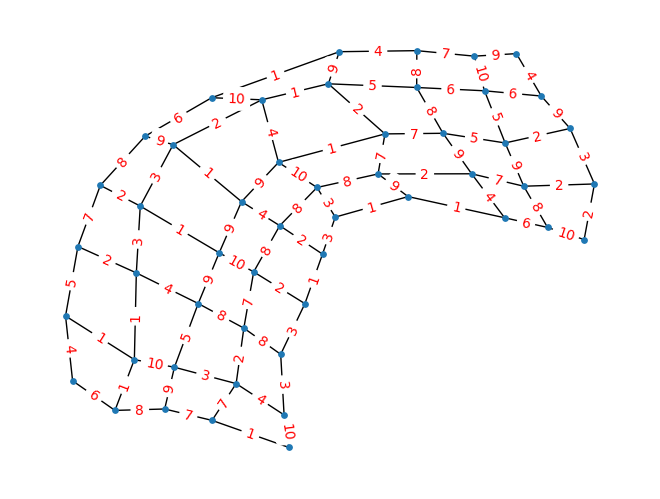

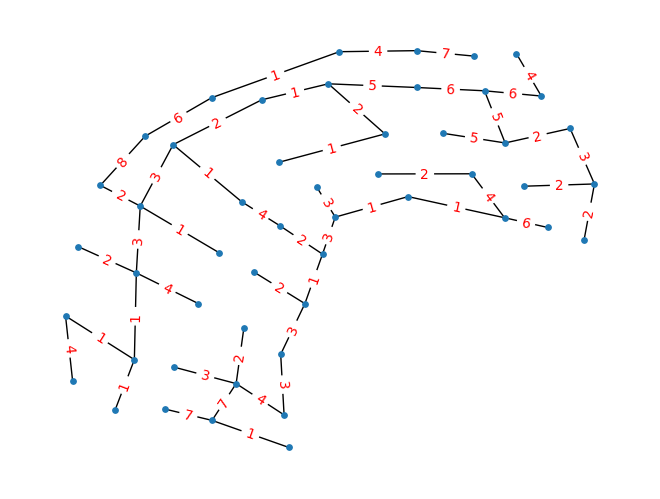

In [40]:
import random

# Выбор случайных ребер и изменение их весов
random_edges = random.sample(list(G_copy.edges()), 5)
for u, v in random_edges:
    G_copy[u][v]['weight'] = random.randint(1,3)

# Построение остовного дерева минимального веса
T = nx.minimum_spanning_tree(G_copy)

# Вывод результатов
print("Ребра остовного дерева минимального веса:")
print(T.edges(data=True))

print("Вес остовного дерева минимального веса:", sum(data['weight'] for _, _, data in T.edges(data=True)))

# 2. Визуализация изменения решения:

# Визуализация графа
# g_layout = nx.spring_layout(G_copy)
nx.draw(G_copy, pos=g_layout, font_weight="medium", node_size=15, font_color="blue")
edge_labels = nx.get_edge_attributes(G_copy, "weight")
nx.draw_networkx_edge_labels(G_copy, pos=g_layout, edge_labels=edge_labels, font_color="red")
plt.show()

# Визуализация остовного дерева минимального веса
t_layout = nx.spring_layout(T)
nx.draw(T, pos=g_layout, font_weight="medium", node_size=15, font_color="blue")
edge_labels = nx.get_edge_attributes(T, "weight")
nx.draw_networkx_edge_labels(T, pos=g_layout, edge_labels=edge_labels, font_color="red")
print()
plt.show()

Задача 3.
1.	Провести 30 итераций задачи 2.
2.	Построить график изменения количественного (изменение весов остовного дерева) и структурного (количество поменявшихся ребер от итерации к итерации) изменения.


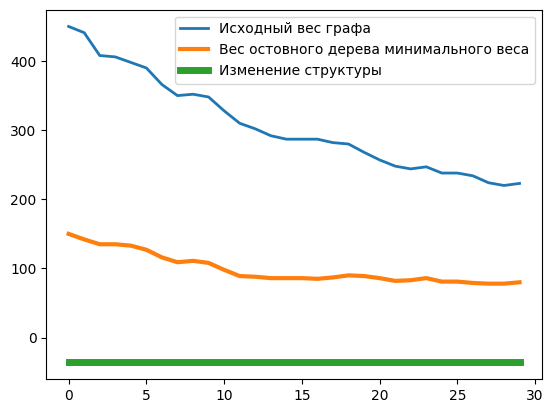

In [79]:
# При итерациях используем копия изначального графа из первого задания - G_copy

def run_iterations(graph, iterations):
    results = []
    for i in range(iterations):
        # Выбор случайных ребер и изменение их весов
        random_edges = random.sample(list(graph.edges()), 5)
        for u, v in random_edges:
            graph[u][v]['weight'] = random.randint(1,3)

        # Построение остовного дерева минимального веса
        T = nx.minimum_spanning_tree(graph)

        # Расчет количественных изменений
        total_weight_before = sum(data['weight'] for _, _, data in graph.edges(data=True))
        total_weight_after = sum(data['weight'] for _, _, data in T.edges(data=True))
        weight_change = total_weight_after - total_weight_before

        # Расчет структурных изменений
        edges_before = set(graph.edges())
        edges_after = set(T.edges())
        added_edges = edges_after - edges_before
        removed_edges = edges_before - edges_after

        edges_changed = len(added_edges) - len(removed_edges)

        # Сохранение результатов
        results.append((total_weight_before, total_weight_after, weight_change, edges_changed))

    return results, T

# Запуск 30 итераций
results, T = run_iterations(G_copy, 30)

# Построение графика изменения количественных и структурных параметров
plt.plot(range(30), [r[0] for r in results], label="Исходный вес графа", linewidth=2)
plt.plot(range(30), [r[1] for r in results], label="Вес остовного дерева минимального веса", linewidth=3)
# plt.plot(range(30), [r[2] for r in results], label="Изменение веса", linewidth=4)
plt.plot(range(30), [r[3] for r in results], label="Изменение структуры", linewidth=5)
plt.legend()
plt.show()

Вес остовного дерева минимального веса после 30 итераций с рандомным изменением весов (1, 3): 80


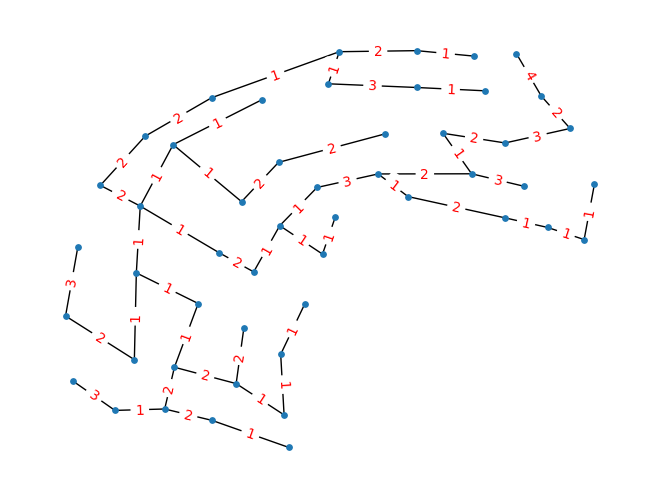

In [81]:
nx.draw(T, pos=g_layout, font_weight="medium", node_size=15, font_color="blue")
edge_labels = nx.get_edge_attributes(T, "weight")

nx.draw_networkx_edge_labels(T, pos=g_layout, edge_labels=edge_labels, font_color="red")
print("Вес остовного дерева минимального веса после 30 итераций с рандомным изменением весов (1, 3):", sum(data['weight'] for _, _, data in T.edges(data=True)))
plt.show()

Задача 4.
1.	Решить Задачу 3, меняя диапазон изменения весов. Т.е. заменив диапазон от 1 до 3 на другой.
2.	Провести сравнение (анализ) результатов с задачей 


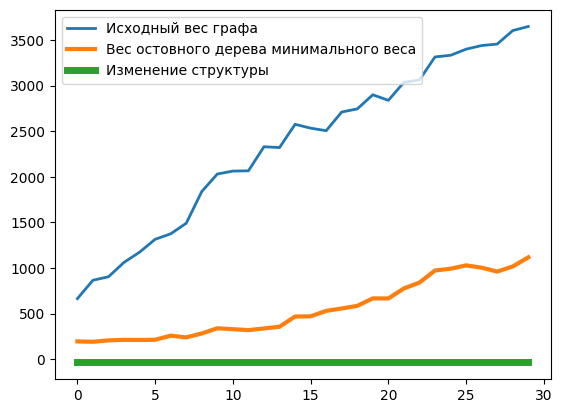

In [86]:
# Меняем веса от 1 до 100

def run_iterations(graph, iterations):
    results = []
    for i in range(iterations):
        # Выбор случайных ребер и изменение их весов
        random_edges = random.sample(list(graph.edges()), 5)
        for u, v in random_edges:
            graph[u][v]['weight'] = random.randint(1, 100)

        # Построение остовного дерева минимального веса
        T = nx.minimum_spanning_tree(graph)

        # Расчет количественных изменений
        total_weight_before = sum(data['weight'] for _, _, data in graph.edges(data=True))
        total_weight_after = sum(data['weight'] for _, _, data in T.edges(data=True))
        weight_change = total_weight_after - total_weight_before

        # Расчет структурных изменений
        edges_before = set(graph.edges())
        edges_after = set(T.edges())
        added_edges = edges_after - edges_before
        removed_edges = edges_before - edges_after

        edges_changed = len(added_edges) - len(removed_edges)

        # Сохранение результатов
        results.append((total_weight_before, total_weight_after, weight_change, edges_changed))

    return results, T

# Запуск 30 итераций
results, T = run_iterations(G_copy, 30)

# Построение графика изменения количественных и структурных параметров
plt.plot(range(30), [r[0] for r in results], label="Исходный вес графа", linewidth=2)
plt.plot(range(30), [r[1] for r in results], label="Вес остовного дерева минимального веса", linewidth=3)
# plt.plot(range(30), [r[2] for r in results], label="Изменение веса", linewidth=4)
plt.plot(range(30), [r[3] for r in results], label="Изменение структуры", linewidth=5)
plt.legend()
plt.show()

Вес остовного дерева минимального веса после 30 итераций с рандомным изменением весов (1, 100):
 1117


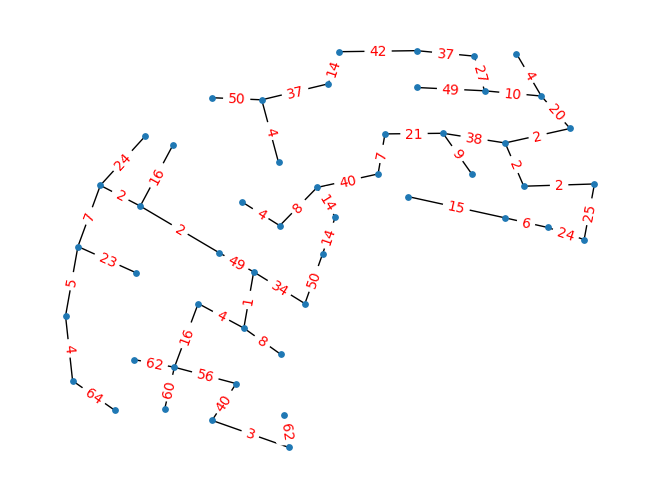

In [89]:
# T = nx.minimum_spanning_tree(G)
nx.draw(T, pos=g_layout, font_weight="medium", node_size=15, font_color="blue")
edge_labels = nx.get_edge_attributes(T, "weight")

nx.draw_networkx_edge_labels(T, pos=g_layout, edge_labels=edge_labels, font_color="red")
print("Вес остовного дерева минимального веса после 30 итераций с рандомным изменением весов (1, 100):\n", sum(data['weight'] for _, _, data in T.edges(data=True)))
plt.show()

Видим, что при увеличении весов в диапазоне от (1 до 100) сильно увеличивается исходный вес графа и вес остовного дерева минимального веса, что вполне логично